# Lab Meeting Presentation Notebook
Adam Klie
08/15/2021

Notebook to put together results figures for lab meeting presentation on 08/16/2021

In [1]:
# Classics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Loading webpages
from IPython.display import IFrame

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

In [2]:
import sys
sys.path.append('/cellar/users/aklie/projects/EUGENE/bin/')
import project_utils

# Results from LR and RF

## Load data

In [63]:
X, y = np.loadtxt('../data/2021_OLS_Library/mixed/X_mixed_0.18-0.4.txt', delimiter=' ', dtype=float), np.loadtxt('../data/2021_OLS_Library/y_binary_0.18-0.4.txt', delimiter=' ', dtype=int)

In [64]:
X.shape, y.shape

((302936, 21), (302936,))

In [65]:
X[0], y[0]

(array([12. ,  0. ,  0. ,  0.9,  2. ,  1. ,  1. ,  0.6,  7. ,  1. ,  1. ,
         0.4,  5. ,  0. ,  0. ,  0.3,  0. ,  0. ,  1. ,  0.5,  1. ]),
 1)

In [66]:
# Don't remove current feature if more than one unique value
np.unique(X[:,-1], return_counts=True)

(array([0., 1.]), array([ 30873, 272063]))

### **Train/test split**

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
split = 0.9

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=13, shuffle=True)

In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((272642, 21), (30294, 21), (272642,), (30294,))

In [71]:
np.unique(y_train, return_counts=True)[1]/len(y_train), np.unique(y_test, return_counts=True)[1]/len(y_test)

(array([0.68878236, 0.31121764]), array([0.69115997, 0.30884003]))

### **Standardize features**: *For mixed encoding only*

In [72]:
scale_indeces = np.array([0, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20])

In [73]:
means = X_train[:, scale_indeces].mean(axis=0)
stds = X_train[:, scale_indeces].std(axis=0)

In [74]:
X_train[:, scale_indeces] -= means
X_train[:, scale_indeces] /= stds

In [75]:
X_train[:, scale_indeces].mean(axis=0), X_train[:, scale_indeces].std(axis=0)

(array([ 4.95166261e-18,  5.08666057e-16, -5.46246570e-17, -9.37870960e-16,
        -2.41979933e-17, -4.33452908e-16, -1.22879417e-16,  3.65015719e-16,
         1.01274531e-16,  7.06367702e-16,  9.42379579e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [76]:
X_test[:, scale_indeces] -= means
X_test[:, scale_indeces] /= stds

## Predictions

In [77]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc

In [78]:
fprs_tr, tprs_tr, roc_aucs_tr = {}, {}, {}
precs_tr, recs_tr, avg_precs_tr = {}, {}, {}

fprs, tprs, roc_aucs = {}, {}, {}
precs, recs, avg_precs = {}, {}, {}

### **Logisitic Regression** Predictions

In [83]:
from sklearn.linear_model import LogisticRegression
import pickle

file = '../LR/0.18-0.4_mixed_LR-clf.pickle'
clf = pickle.load(open(file, 'rb'))

In [84]:
y_tr_probs = clf.predict_proba(X_train)[:, 1]
y_probs = clf.predict_proba(X_test)[:, 1]

In [86]:
fprs_tr['LR'], tprs_tr['LR'], threshs = roc_curve(y_true=y_train, y_score=y_tr_probs)
roc_aucs_tr['LR'] = auc(fprs_tr['LR'], tprs_tr['LR'])

precs_tr['LR'], recs_tr['LR'], threshs = precision_recall_curve(y_true=y_train, probas_pred=y_tr_probs)
avg_precs_tr['LR'] = average_precision_score(y_true=y_train, y_score=y_tr_probs)

In [87]:
fprs['LR'], tprs['LR'], threshs = roc_curve(y_true=y_test, y_score=y_probs)
roc_aucs['LR'] = auc(fprs['LR'], tprs['LR'])

precs['LR'], recs['LR'], threshs = precision_recall_curve(y_true=y_test, probas_pred=y_probs)
avg_precs['LR'] = average_precision_score(y_true=y_test, y_score=y_probs)

### **Random Forest** Predictions

In [79]:
from sklearn.ensemble import RandomForestClassifier
import pickle

file = '../RF/0.18-0.4_mixed_RF-clf_randomCV.pickle'
clf = pickle.load(open(file, 'rb'))

In [80]:
y_tr_probs = clf.predict_proba(X_train)[:, 1]
y_probs = clf.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   15.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   27.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:   42.4s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 1800 out of 1800 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done 1800 

In [81]:
fprs_tr['RF'], tprs_tr['RF'], threshs = roc_curve(y_true=y_train, y_score=y_tr_probs)
roc_aucs_tr['RF'] = auc(fprs_tr['RF'], tprs_tr['RF'])

precs_tr['RF'], recs_tr['RF'], threshs = precision_recall_curve(y_true=y_train, probas_pred=y_tr_probs)
avg_precs_tr['RF'] = average_precision_score(y_true=y_train, y_score=y_tr_probs)

In [82]:
fprs['RF'], tprs['RF'], threshs = roc_curve(y_true=y_test, y_score=y_probs)
roc_aucs['RF'] = auc(fprs['RF'], tprs['RF'])

precs['RF'], recs['RF'], threshs = precision_recall_curve(y_true=y_test, probas_pred=y_probs)
avg_precs['RF'] = average_precision_score(y_true=y_test, y_score=y_probs)

# Results from gkSVM

## **Training scores**

In [88]:
# Make sure ordering is correct
pos_tr_scores = project_utils.get_scores('../gkSVM/Result_0.18-0.4_baseline/X_fasta_0.18-0.4_baseline.tr.predict.txt')
neg_tr_scores = project_utils.get_scores('../gkSVM/Result_0.18-0.4_baseline/X_fasta_0.18-0.4_baseline.neg.tr.predict.txt')

In [89]:
y_tr_probs = np.array(pos_tr_scores + neg_tr_scores)

In [90]:
y_train = np.array([1]*len(pos_tr_scores) + [0]*len(neg_tr_scores))

In [91]:
print(y_train.shape, y_tr_probs.shape)

(272642,) (272642,)


## **Test scores**

In [92]:
# Make sure ordering is correct
pos_scores = project_utils.get_scores('../gkSVM/Result_0.18-0.4_baseline/X_fasta_0.18-0.4_baseline.predict.txt')
neg_scores = project_utils.get_scores('../gkSVM/Result_0.18-0.4_baseline/X_fasta_0.18-0.4_baseline.neg.predict.txt')

In [93]:
y_probs = np.array(pos_scores + neg_scores)

In [94]:
y_test = np.array([1]*len(pos_scores) + [0]*len(neg_scores))

In [95]:
print(y_test.shape, y_probs.shape)

(30294,) (30294,)


## **Evaluation**

In [97]:
fprs_tr['gkSVM'], tprs_tr['gkSVM'], threshs = roc_curve(y_true=y_train, y_score=y_tr_probs)
roc_aucs_tr['gkSVM'] = auc(fprs_tr['gkSVM'], tprs_tr['gkSVM'])

precs_tr['gkSVM'], recs_tr['gkSVM'], threshs = precision_recall_curve(y_true=y_train, probas_pred=y_tr_probs)
avg_precs_tr['gkSVM'] = average_precision_score(y_true=y_train, y_score=y_tr_probs)

In [98]:
fprs['gkSVM'], tprs['gkSVM'], threshs = roc_curve(y_true=y_test, y_score=y_probs)
roc_aucs['gkSVM'] = auc(fprs['gkSVM'], tprs['gkSVM'])

precs['gkSVM'], recs['gkSVM'], threshs = precision_recall_curve(y_true=y_test, probas_pred=y_probs)
avg_precs['gkSVM'] = average_precision_score(y_true=y_test, y_score=y_probs)

# Plots

In [101]:
colormap = {'LR': 'blue', 'RF': 'red', 'gkSVM': 'green'}

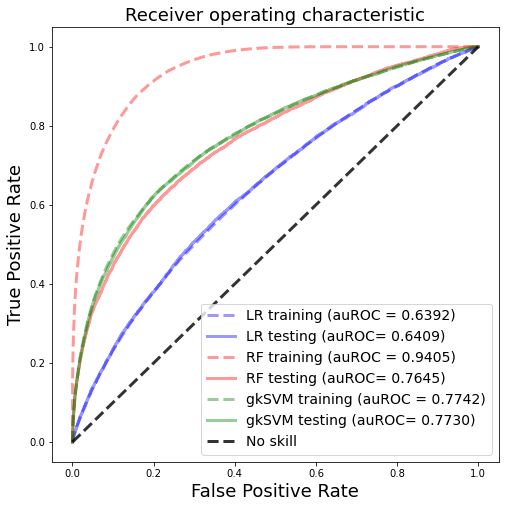

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

for model in ['LR', 'RF', 'gkSVM']:
    ax.plot(fprs_tr[model], tprs_tr[model], ls='--', lw=3, c=colormap[model], alpha=0.4, label='%s training (auROC = %0.4f)' % (model, roc_aucs_tr[model]))
    ax.plot(fprs[model], tprs[model], ls='-', lw=3, c=colormap[model], alpha=0.4, label='%s testing (auROC= %0.4f)' % (model, roc_aucs[model]))    
ax.plot([0, 1], [0, 1], linestyle='--', lw=3, color='k', label='No skill', alpha=.8)
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=18)
ax.set_ylabel('True Positive Rate', fontsize=18)
ax.set_title('Receiver operating characteristic', fontsize=18)
ax.legend(loc="lower right", fontsize=14);

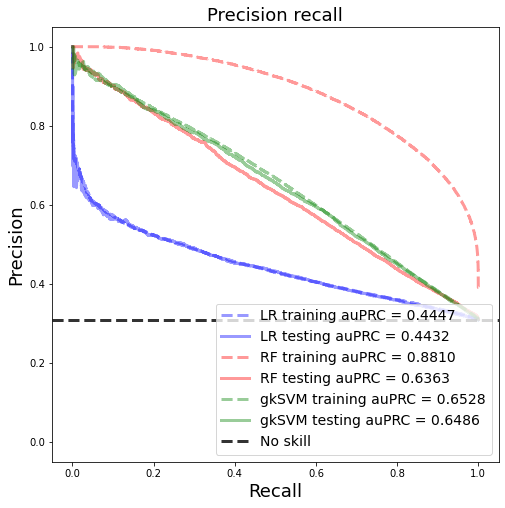

In [106]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
for model in ['LR', 'RF', 'gkSVM']:
    ax.step(recs_tr[model], precs_tr[model], where='post', ls='--', lw=3, c=colormap[model], alpha=0.4, label='%s training auPRC = %0.4f' % (model, avg_precs_tr[model]))
    ax.step(recs[model], precs[model], where='post', ls='-', lw=3, c=colormap[model], alpha=0.4, label='%s testing auPRC = %0.4f' % (model, avg_precs[model]))
ax.axhline(len(y_test[y_test==1])/len(y_test), linestyle='--', lw=3, color='k', label='No skill', alpha=.8)
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.set_xlabel('Recall', fontsize=18)
ax.set_ylabel('Precision', fontsize=18)
ax.set_title('Precision recall', fontsize=18)
ax.legend(loc="lower right", fontsize=14);